In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import clean_data
import helpers


# Preamble

With the anticipation of Monster Hunter Rise, I wanted to take a look at the previous games in the Monster Hunter series. Monster Hunter is a series of video games made by Capcom that you play as a hunter that hunts various different and unique monsters. Each new installment brings new Monsters, new ways to hunt the monsters and also brings older monsters from previous games. I will be looking at the monsters from the Global releases with the exception of Monster Hunter Portable 3rd and Monster Hunter 4 (which was only released in Japan). Each game in the series is a part of a generation. A base version is realease followed by a sequel (known as a ultimate expansion of the base game). the expansion brings more monsters.

### Table shows the titles that will be analyzed and which generation they belong to.

| Generation 1 | Generation 2 | Generation 3 | Generation 4 | Generation 5 |
|:------------:|:------------:|:------------:|:------------:|:------------:|
|Monster Hunter|Monster Hunter Freedom 2|Monster Hunter 3|Monster Hunter 4|Monster Hunter: World|
|Monster Hunter Freedom|Monster Hunter Freedom Unite|Monster Hunter 3 Ultmate|Monster Hunter 4 Ultimate|Monster Hunter World: Iceborne|
|              |              |Monster Hunter Portable 3rd|Monster Hunter Generations|Monster Hunter Rise|
|              |              |            |Monster Hunter Generations Ultimate|          |




# Import Data

There are 3 csv files that was manualy made that include data such as monsters in each games, specific monster data, and title information


In [10]:
mh_data = clean_data.get_data()
mh_data

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
0,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
1,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
2,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
3,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
4,Alatreon,Elder Dragon,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
...,...,...,...,...,...,...,...,...,...
2496,Vespoid,Neopteron,Small,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2497,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable
2498,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2499,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable



## Amount of Monsters

I wanted to see what how many monsters and what the proportion between new monsters to monster that were already introduced.

The analysis will be done on the following titles:
* Monster Hunter
* Monster Hunter Freedom 2
* Monster Hunter 3
* Monster Hunter Portable 3rd
* Monster Hunter 4
* Monster Hunter Generations
* Monster Hunter: World
* Monster Hunter Rise
* Monster Hunter Freedom
* Monster Hunter Freedom Unite
* Monster Hunter 3 Ultimate
* Monster Hunter 4 Ultimate
* Monster Hunter Generations Ultimate
* Monster Hunter World: Iceborne

We can filter the titles we want to analyze and for each title obtain:
* Amount of total monsters
* Amount of large monsters
* Amount of small monsters
* Amount of new monsters
* Amount of new large monsters
* Amount of new small monsters
* Amount of Variant/Subspecies/Deviants
    
    *note: the difference between size of a monsters is that large monsters are considered "bosses"*

in order to find the new monsters in the title, we need to get the list of monsters from title and a list of monsters from all previous titles and take the difference of the previous monsters and the title monsters.





In [25]:
analysis_titles = pd.DataFrame(
    {"Base": pd.Series(['Monster Hunter','Monster Hunter Freedom 2', 'Monster Hunter 3', 'Monster Hunter Portable 3rd',
              'Monster Hunter 4','Monster Hunter Generations', 'Monster Hunter: World', 'Monster Hunter Rise',]),
     "Ultimate": pd.Series(['Monster Hunter Freedom', 'Monster Hunter Freedom Unite', 'Monster Hunter 3 Ultimate', np.nan, 
            'Monster Hunter 4 Ultimate', 'Monster Hunter Generations Ultimate', 'Monster Hunter World: Iceborne', np.nan,])})

analysis_titles_lst = analysis_titles['Base'].append(analysis_titles['Ultimate']).dropna()
# filter for analysis Titles
titles_search_data = mh_data[mh_data['Title'].isin(analysis_titles_lst)==True]
amt_monsters_df = pd.DataFrame(columns=['Title','Release Date','Total Monsters', 'Large Monsters','Small Monsters',
                      'New Monsters', 'New Large Monsters', 'New Small Monsters','Variant Monsters'])
valid_titles = titles_search_data['Title'].unique()
for title in valid_titles:
    title_data = titles_search_data[titles_search_data['Title'] == title]
    title_date = min(title_data['Date Released'])

    monsters_from_prev_games = titles_search_data[titles_search_data['Date Released'] < title_date]['Name'].drop_duplicates()
    monsters_in_title = title_data[['Name','Type','Size']].drop_duplicates()
    new_monsters = monsters_in_title[monsters_in_title['Name'].isin(monsters_from_prev_games) == False]
    num_variants = monsters_in_title[monsters_in_title['Size'] == 'Large']['Name'].count() - len(helpers.filter_out_variants(monsters_in_title[monsters_in_title['Size'] == 'Large']))
    try:
        new_large_t_monsters = new_monsters.groupby(['Size']).size().Large
    except:
        new_large_t_monsters = 0
    try:
        new_small_t_monsters = new_monsters.groupby(['Size']).size().Small
    except:
        new_small_t_monsters = 0

    df_segment = pd.DataFrame(
                      [[title,
                      title_date,
                      monsters_in_title['Name'].count(),
                      monsters_in_title.groupby(['Size']).size().Large,
                      monsters_in_title.groupby(['Size']).size().Small,
                      new_monsters['Name'].count(),
                      new_large_t_monsters,
                      new_small_t_monsters,
                       num_variants]],
                        columns=['Title','Release Date','Total Monsters', 'Large Monsters','Small Monsters',
                  'New Monsters', 'New Large Monsters', 'New Small Monsters','Variant Monsters'])
    amt_monsters_df = pd.concat([amt_monsters_df,df_segment])

amt_monsters_df = amt_monsters_df.sort_values(by=['Release Date']).reset_index(drop=False)
amt_monsters_df['New Monster Ratio'] = amt_monsters_df['New Large Monsters'] / amt_monsters_df['Large Monsters']
amt_monsters_df['Variant Monster Ratio'] = amt_monsters_df['Variant Monsters'] / amt_monsters_df['Large Monsters']
amt_monsters_df[['Title','Total Monsters', 'Large Monsters','Small Monsters',
                      'New Monsters', 'New Large Monsters', 'New Small Monsters','Variant Monsters']]

,Title,Total Monsters,Large Monsters,Small Monsters,New Monsters,New Large Monsters,New Small Monsters,Variant Monsters
0,Monster Hunter,30,18,12,30,18,12,0
1,Monster Hunter Freedom,44,32,12,14,14,0,13
2,Monster Hunter Freedom 2,70,48,22,27,17,10,15
3,Monster Hunter Freedom Unite,81,59,22,11,11,0,20
4,Monster Hunter 3,35,20,15,26,16,10,0
5,Monster Hunter Portable 3rd,60,42,18,20,17,3,11
6,Monster Hunter 3 Ultimate,73,53,20,11,10,1,21
7,Monster Hunter 4,72,54,18,16,14,2,18
8,Monster Hunter 4 Ultimate,98,77,21,12,12,0,33
9,Monster Hunter Generations,105,73,32,22,19,3,16


In [29]:
labels = amt_monsters_df['Title'].apply(lambda x: x + " " * 2 )
amt_monsters = amt_monsters_df['Total Monsters']
large_monters = amt_monsters_df['Large Monsters']
small_monsters = amt_monsters_df['Small Monsters']
total_new_monsters = amt_monsters_df['New Monsters']
new_large_monsters = amt_monsters_df['New Large Monsters']
new_small_monsters = amt_monsters_df['New Small Monsters']
fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
ax.grid(axis='x',zorder=0)
width = 0.25
rects1 = np.arange(len(labels))
rects2 = [x + width for x in rects1]
rects3 = [x + width for x in rects2]
rects4 = rects1
rects5 = rects2
rects6 = rects3
ax.barh(rects1, amt_monsters, height=width,edgecolor='white', label='Total Monsters',color='#cb6a63',zorder=2)
ax.barh(rects2, large_monters, height=width,edgecolor='white', label='Large Monsters',color='#736aab',zorder=2)
ax.barh(rects3, small_monsters, height=width,edgecolor='white', label='Small Monsters',color='#d9b66f',zorder=2)
ax.barh(rects4, total_new_monsters, height=width,edgecolor='white', label='New Monsters',color='#ce9f97',hatch='/',zorder=2)
ax.barh(rects5, new_large_monsters, height=width,edgecolor='white', label='New Large Monsters',color='#adaabf',hatch='/',zorder=2)
ax.barh(rects6, new_small_monsters, height=width,edgecolor='white', label='New Small Monsters',color='#d2bc96',hatch='/',zorder=2)
ax.set_xlabel("Number of Monsters", fontsize='15',color='#423e35')
ax.set_yticks(rects1)
ax.set_yticklabels(labels,fontsize='15',color='#423e35')
ax.legend(fontsize='12')
ax.invert_yaxis()
ax.set_title('Amount of Monsters in Mainline Series',color='#423e35',fontsize='20')
ax.set_facecolor('#fcf3ea')
fig.set_facecolor('#fcf3ea')
fig.set_edgecolor(color='#98805c')
fig.patch.set_linewidth('1')  
fig.savefig('Figures/amt_monsters.png',
            facecolor=fig.get_facecolor(),
            edgecolor=fig.get_edgecolor(),
            bbox_inches="tight")
plt.close()

![](Figures/amt_monsters.png)

The trends in the ratio of new monsters seem consisent with the exception of Monster Hunter, and Monster Hunter Generations Ultimate. Monster Hunter is the first game and Monster Hunter Generations Ultimate was a title that the wanted to bring back monsters from the previous games which explains the high to low ratios. Monster Hunter 3 has a low total monsters but a high ratio of new monsters. 


In [27]:
print("Mean of New Monster Ratio: ",amt_monsters_df['New Monster Ratio'].mean())
print("Median of New Monster Ratio: ",amt_monsters_df['New Monster Ratio'].median())
print("\nMean of Variant Monster Ratio: ",amt_monsters_df['Variant Monster Ratio'].mean())
print("Median of Variant Monster Ratio: ",amt_monsters_df['Variant Monster Ratio'].median())
amt_monsters_df[['Title','New Monster Ratio','Variant Monster Ratio']] 

Mean of New Monster Ratio:  0.3841083909187422
Median of New Monster Ratio:  0.3072203196347032

Mean of Variant Monster Ratio:  0.2514399814116347
Median of Variant Monster Ratio:  0.287828947368421


,Title,New Monster Ratio,Variant Monster Ratio
0,Monster Hunter,1,0
1,Monster Hunter Freedom,0.4375,0.40625
2,Monster Hunter Freedom 2,0.354167,0.3125
3,Monster Hunter Freedom Unite,0.186441,0.338983
4,Monster Hunter 3,0.8,0
5,Monster Hunter Portable 3rd,0.404762,0.261905
6,Monster Hunter 3 Ultimate,0.188679,0.396226
7,Monster Hunter 4,0.259259,0.333333
8,Monster Hunter 4 Ultimate,0.155844,0.428571
9,Monster Hunter Generations,0.260274,0.219178


The monsters with the most occurances throughout the series is **Rathalos** and **Rathian** which have shown up in all analysis titles.

Rathalos  | Rathian
:-------------------------:|:----------------------:
![Rathalo](Resources/MHRise-Rathalos_Render_003.png) | ![Rathian](Resources/Rathian_Transparent01.png)

*Images from MonsterHunter.fandom*

In [82]:
monster_occurance_data = mh_data[mh_data['Title'].isin(analysis_titles_lst) == True].sort_values(by=['Date Released']).drop_duplicates(subset=['Title','Name'],keep='first')
monster_occurance_data = monster_occurance_data[monster_occurance_data['Size'] == "Large"].groupby(['Name'])['Type'].count().sort_values(ascending=False)
monster_occurance_data.head(10)

Name
Rathian            14
Rathalos           14
Diablos            12
Felyne             12
Silver Rathalos    10
Gold Rathian       10
Kirin              10
Teostra             9
Tigrex              9
Kushala Daora       9
Name: Type, dtype: int64

### Sorting monsters to Directors
I want to find if a director is more likely to use monsters that they have introduced
I want to get the data to have the relavant titles
total_new_monsters

In [15]:
title_data = mh_data[mh_data['Title'].isin(analysis_titles_lst) == True]
filter_exclude_jpn = title_data['Country Released'] != 'JPN'
filter_title_except = title_data['Title'] == 'Monster Hunter Portable 3rd'
filter_large = title_data['Size'] == 'Large'

title_data_p1 = title_data.where(filter_exclude_jpn & filter_large).dropna()
title_data_p2 = title_data.where(filter_title_except & filter_large).dropna()
title_data = pd.concat([title_data_p1,title_data_p2])

title_data[['Title','Director']].drop_duplicates(subset='Title').groupby('Director').count()
director_data = title_data.sort_values(by=['Name','Date Released']).drop_duplicates(subset=['Name'],keep='first')
director_data[director_data['Director'] == 'Kaname Fujioka']
# Kaname_monsters = director_data[director_data['Director'] == 'Kaname Fujioka']
# Yasunori_monsters = director_data[director_data['Director'] == 'Yasunori Ichinose']

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
1,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3.0,Kaname Fujioka,3DS
523,Agnaktor,Leviathan,Large,Monster Hunter 3,North America,2010-04-20,3.0,Kaname Fujioka,Wii
525,Alatreon,Elder Dragon,Large,Monster Hunter 3,North America,2010-04-20,3.0,Kaname Fujioka,Wii
1725,Ash Kecha Wacha,Fanged Beast,Large,Monster Hunter 4 Ultimate,North America,2015-02-13,4.0,Kaname Fujioka,3DS
535,Barioth,Flying Wyvern,Large,Monster Hunter 3,North America,2010-04-20,3.0,Kaname Fujioka,Wii
...,...,...,...,...,...,...,...,...,...
1807,Tigerstripe Zamtrios,Amphibian,Large,Monster Hunter 4 Ultimate,North America,2015-02-13,4.0,Kaname Fujioka,3DS
587,Uragaan,Brute Wyvern,Large,Monster Hunter 3,North America,2010-04-20,3.0,Kaname Fujioka,Wii
2330,Velocidrome,Bird Wyvern,Large,Monster Hunter,North America,2004-09-21,1.0,Kaname Fujioka,PlayStation 2
2336,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter,North America,2004-09-21,1.0,Kaname Fujioka,PlayStation 2



# Base Vs Ultimate?

Another question is how many months between a base game and the ultimate release. with the ultimate realease, it brings more monsters and more things to do!  

To find the amount of months between the version, I will use the japan release titles, the reason is titles were released in japan monsths before coming to the west.  

In [69]:
game_titles = pd.DataFrame(
    {"Base": pd.Series(['Monster Hunter','Monster Hunter Freedom 2', 'Monster Hunter 3',
              'Monster Hunter 4','Monster Hunter X', 'Monster Hunter: World',]),
     "Ultimate": pd.Series(['Monster Hunter G', 'Monster Hunter Freedom Unite', 'Monster Hunter 3 Ultimate',
            'Monster Hunter 4 G', 'Monster Hunter XX', 'Monster Hunter World: Iceborne'])})
game_titles_lst = jpn_titles['Base'].append(jpn_titles['Ultimate']).dropna()

game_title_data = mh_data[mh_data['Title'].isin(game_titles_lst) == True]
game_title_data = jpn_title_data[['Title','Date Released']].sort_values(by=['Date Released']).drop_duplicates(subset=['Title'],keep='first')

base = pd.merge(game_title_data, game_titles,left_on='Title',right_on="Base",how='right').dropna()[['Title','Date Released']]
ultimate = pd.merge(game_title_data, game_titles,left_on='Title',right_on="Ultimate",how='left').dropna()[['Title','Date Released']]
base = base.reset_index(drop=True).reset_index()
ultimate = ultimate.reset_index(drop=True).reset_index()
base['Large Monsters'] = base['Title'].apply(lambda title: 
                                            len(mh_data[(mh_data['Title'] == title) & (mh_data['Size'] == 'Large')]['Name'].unique()))
ultimate['Large Monsters'] = ultimate['Title'].apply(lambda title: 
                                            len(mh_data[(mh_data['Title'] == title) & (mh_data['Size'] == 'Large')]['Name'].unique()))
game_date_data = pd.merge(base,ultimate,on='index',suffixes=('_base', '_ultimate'))
game_date_data
game_date_data['date_difference'] = abs( game_date_data['Date Released_ultimate'] - game_date_data['Date Released_base'])
game_date_data['monster_difference'] = abs( game_date_data['Large Monsters_ultimate'] - game_date_data['Large Monsters_base'])

print("Mean of time between games",game_date_data['date_difference'].mean().days/30.5)
print("Median of time between games",game_date_data['date_difference'].median().days/30.5)
game_date_data

Mean of time between games 16.557377049180328
Median of time between games 14.327868852459016


,index,Title_base,Date Released_base,Large Monsters_base,Title_ultimate,Date Released_ultimate,Large Monsters_ultimate,date_difference,monster_difference
0,0,Monster Hunter,2004-03-11,18,Monster Hunter G,2005-01-20,28,315 days,10
1,1,Monster Hunter Freedom 2,2007-02-22,48,Monster Hunter Freedom Unite,2008-03-27,59,399 days,11
2,2,Monster Hunter 3,2009-08-01,20,Monster Hunter 3 Ultimate,2011-12-10,53,861 days,33
3,3,Monster Hunter 4,2013-09-14,54,Monster Hunter 4 G,2014-10-11,77,392 days,23
4,4,Monster Hunter X,2015-11-28,73,Monster Hunter XX,2017-03-18,95,476 days,22
5,5,Monster Hunter: World,2018-01-26,36,Monster Hunter World: Iceborne,2019-09-06,71,588 days,35


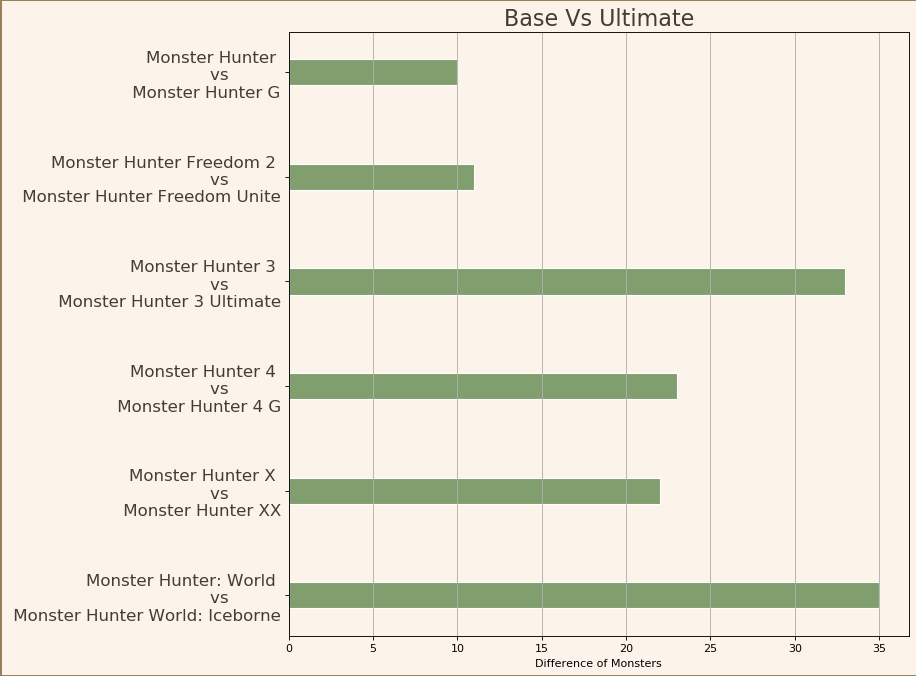

In [86]:
labels = ['Monster Hunter \nvs          \n Monster Hunter G',
         'Monster Hunter Freedom 2 \nvs          \n Monster Hunter Freedom Unite',
         'Monster Hunter 3 \nvs          \n Monster Hunter 3 Ultimate',
         'Monster Hunter 4 \nvs          \n Monster Hunter 4 G',
         'Monster Hunter X \nvs          \n Monster Hunter XX',
         'Monster Hunter: World \nvs          \n Monster Hunter World: Iceborne']
monsters_diff = game_date_data['monster_difference']
fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
ax.grid(axis='x',zorder=0)
width = 0.25
rects1 = np.arange(len(labels))
ax.barh(rects1, monsters_diff, height=width,edgecolor='white', label='Total Monsters',color='#809e6e')

ax.set_yticks(rects1)
ax.set_yticklabels(labels,fontsize='15',color='#423e35')
ax.invert_yaxis()
ax.set_title('Base Vs Ultimate',color='#423e35',fontsize='20')
ax.set_xlabel('Difference of Monsters')
ax.set_facecolor('#fcf3ea')
fig.set_facecolor('#fcf3ea')
fig.set_edgecolor(color='#98805c')
fig.patch.set_linewidth('1')  
fig.savefig('Figures/base_vs_ultimate.png',
            facecolor=fig.get_facecolor(),
            edgecolor=fig.get_edgecolor(),
            bbox_inches="tight")
